# Lab 1.1

## Section 1: Running Code in Jupyter Notebook
This lab is an example of code written in a Jupyter Notebook. You'll notice that each piece of code lives in a cell. Cells structure the notebook and allow you to run each cell individually. To run the code in a cell, press Shift and Enter or click the Run button above. To run multiple cells at once, choose one of the options in the Cell tab above. After running the code in a cell, its output will appear below it. To practice, try changing and running the code in the cell below.

In [1]:
3 + 8

11

To create new cells, click the + button in the upper left hand corner or by selecting an option from the Insert tab above. Try inserting a cell below and practice running a line of code that will output the number 6.

Stop running code by pressing the Stop button next to Run. Use the Help tab if you need help with your notebook. Remember to save your notebooks by clicking the save button in the upper left hand corner. Also, when you create a new notebook, remember to name it by clicking on the title above next to the "jupyter" logo.

## Section 2: Python Basics

This section will introduce Python coding. For more information or practice, see this tutorial: http://swcarpentry.github.io/python-novice-gapminder/.

###  Modules and Imports
First, we will import the modules for the code to use. These modules include built-in functions. We will call these functions later by writing "module.function(arguments)". This is telling the computer to use the function from the module with the given arguments, or inputs. See the example below:

In [6]:
# First, import the module that has the functions needed.
import math

# Next, call the function from the module with given argument(s).
# For this example, I used the sqrt function from the math module, 
# which returns the square root of a number.
math.sqrt(36)

6.0

For information on each module and function, including what they return or their arguments, look at the documentation at https://docs.python.org/3/. Use the search bar to find information about any module or function.

Also, notice the comments in the code above. The comments begin with a # symbol which means that the line will not be recognized and run as code by the computer. Rather, they serve as communication about the piece of code to another person reading it. When commenting code, too much is better than not enough. Comments will help you debug code and troubleshoot issues more quickly and effectively.

### Variables and Data Types
Next, we will define some variables. Variables store values and can be changed by code. They can be integers, floats (numbers that can have a decimal), or strings (character string, written in quotation marks). When naming variables, use clarity over cleverness. Name them logically so that you or another person can recognize their function in your code.

In [7]:
# int variable
y = -38

# float variables
z = 9
k = -2.89

# string variables
year = "2019"
lab_title = "Lab 1.1"

To display these variables, use the print() function.

In [8]:
print(y)

print(7+y)

print("Hello world")

-38
-31
Hello world


There are also lists of variables. Lists have to have the same type of variable.

In [111]:
# Define lists
list_of_names = ["Bob" "Sara" "Alex"]
list_of_numbers = [2, 8, 9]

# To access a certain part of a list, use name_of_list[index].
# The index starts at 0, so the first component of a list has index 0.
print(list_of_numbers[0])
print(list_of_numbers)

# Change one or more parts of a list using the index.
list_of_numbers[2] = 10

print(list_of_numbers)

2
[2, 8, 9]
[2, 8, 10]


### For Loops and If Statements
For loops use an index to iterate through a section of code multiple times.

In [112]:
# Use for loops to go through a list.
# This for loop prints out every string in the array list_of_names
for name in list_of_names:
    print(name)
    
# Use the range function for the loop index.
# This for loop prints every number from 3 to 7.
for i in range(3,7):
    print(i)
    
# Use a numerical index and the range function to go through a list using 
# the len() function. 
for i in range(len(list_of_names)):
    print(list_of_names[i])
    
# Add an else which will be executed after the for loop.
for i in range(3,7):
    print(i)
else:
    print("Done printing")

BobSaraAlex
3
4
5
6
BobSaraAlex
3
4
5
6
Done printing


If statements will only go through the code if the logical expression is true.

In [113]:
# This for loop combined with the if/else statements will print every number
# in the square_nums list unless its square root is greater than or equal to 6.
square_nums = [9, 16, 25, 36]
for n in square_nums:
    if math.sqrt(n) < 6:
        print(n)
    else:
        print("Square root too high")

9
16
25
Square root too high


### Functions
We can create functions that take in arguments and return variables or lists. This allows us to call on these functions later and is useful when we want to repeat code with different data sets. This example creates a function that adds 7 to each number in a list. When calling this function later, we must give a list of numbers as the argument.

In [114]:
# Define the function name and argument.
def add_seven(list_of_nums):
    
    # Create a new list which the function will return
    new_nums = []
    
    # Use a for loop to add 7 to each number in the list_of_nums and append 
    # it to new_nums using the append() function.
    for i in range(len(list_of_nums)):
        new_nums.append(list_of_nums[i] + 7)
        
    # Return the new list
    return new_nums

# Call our function
prime_numbers = [2, 3, 5, 7, 11]
print(prime_numbers)
new_numbers = add_seven(prime_numbers)
print(new_numbers)

[2, 3, 5, 7, 11]
[9, 10, 12, 14, 18]


### Plotting with matplotlib
Matplotlib is the module used in this class to plot. Below are some important functions used to plot or manipulate plots.

In [27]:
# First, remember that we must import the module that has the functions needed.
import matplotlib.pyplot
# Next, for jupyter notebooks, we have to use an iPython Magic function (indicated with the %)
# to make the matplotlib imagers appear in the notebook so that we can see them.
# Note that this function is specific to the jupyter notebook and only needs to be executed 
# once per notebook
%matplotlib inline

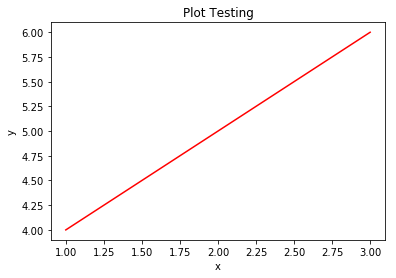

In [28]:
# Create a new figure with figure 1.
matplotlib.pyplot.figure(1)

x = [1, 2, 3]
y = [4, 5, 6]
# Plot x and y in the color red. Try changing the color. Use the documentation
# to see which colors you can use.
matplotlib.pyplot.plot(x, y, 'red')

# Label the axes and title
matplotlib.pyplot.xlabel('x')
matplotlib.pyplot.ylabel('y')
matplotlib.pyplot.title('Plot Testing')

## Section 3: Plotting Data

Now, we will plot data in Python using a real-world dataset.
### Import
Start by importing some modules.

In [29]:
# Module to read .xlsx (Excel) file
import xlrd

# Module to plot.
# The "as plt" names the module plt, making it quicker to use later.
# To call functions from this module, we can type plt.function() rather
# than matplotlib.pyplot.function().
import matplotlib.pyplot as plt

# Module with many functions in manipulating arrays and lists.
import numpy as np

# Module with statistics functions.
import statistics as stats

# Module with normal gaussian curve function.
# Since we don't need the entire scipy.stats library, we add "import norm" 
# to only import the norm function.
from scipy.stats import norm

### Extract Data
Next, parse through the .xlsx data. Do this using the functions imported from the xlrd module. These functions allow us to create objects from the .xlsx data that Python recognizes, including workbooks and sheets. Then, turn these sheets into arrays of data points which we can plot later.
The .xlsx data must be saved to the same folder as your jupyter notebook.

In [30]:
# Define the location of the .xlsx file. These are the names of the files, 
# uploaded to the same folder as your Jupyter Notebook.
Skykomish_Data = ('Skykomish_peak_flow_12134500_skykomish_river_near_gold_bar.xlsx')

# Create workbooks and sheets using xlrd module and the location that we 
# defined above. This allows us to use arrays to plot the data later.
Skykomish_wb = xlrd.open_workbook(Skykomish_Data)
Skykomish_Sheet = Skykomish_wb.sheet_by_index(0)

# Now create and populate years array and peak values array using the data in 
# Skykomish_Sheet.
# Skykyomish_Year will contain the years that data was collected.
# Skykomish_Peak will contain the peak flow values for each year.

# First, define empty arrays for each.
Skykomish_Year = []
Skykomish_Peak = []  

# Next, use a for loop to put the data from the Skykomish_Sheet into the empty
# arrays.
# the .nrows() function returns the number of rows in the sheet.
# Skykomish data has 1 row of comments before data, so define i to start after 
# 1 to skip the comments and use .nrows() end at the last row.
for i in range(1, Skykomish_Sheet.nrows):
    
    # Looking at the Excel data, the years are given in the second column. 
    # Column indexes start at 0, so the second column is 1.
    # The .append() function adds the data point to the end of the array.
    # The .cell_value() returns the data point at (row, column) from the sheet.
    Skykomish_Year.append(Skykomish_Sheet.cell_value(i,1))
    
    # The peak flow values are in column 3 of the data, so this is column index 2.
    Skykomish_Peak.append(Skykomish_Sheet.cell_value(i,2))

### Plot Timeseries
Next, create a timeseries of the data using the arrays created above and the matplotlib module.

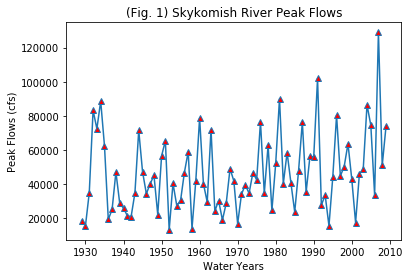

In [35]:
# Plot data by calling functions from the matplotlib module, which we named plt.

# Create a new figure.
plt.figure(1)

# Use the plot() function to plot the year on the x-axis, peak flow values on
# the y-axis with an open circle representing each peak flow value.
plt.plot(Skykomish_Year, Skykomish_Peak, '-^', markerfacecolor='red')

# Label the axes and title.
plt.xlabel('Water Years')
plt.ylabel('Peak Flows (cfs)')
plt.title('(Fig. 1) Skykomish River Peak Flows')



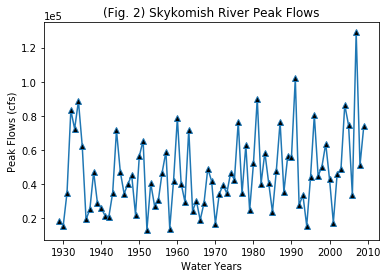

In [37]:
# But this plot doesn't look as pretty as we might like
# Try repeating the above with two more lines
# Create a new figure.
plt.figure(2)

# Use the plot() function to plot the year on the x-axis, peak flow values on
# the y-axis with an open circle representing each peak flow value.
plt.plot(Skykomish_Year, Skykomish_Peak, '-^', markerfacecolor='black')

# Label the axes and title.
plt.xlabel('Water Years')
plt.ylabel('Peak Flows (cfs)')
plt.title('(Fig. 2) Skykomish River Peak Flows')

# Remove scientific notation from x-axis labels.
plt.ticklabel_format(axis='x', useOffset=False)

# Add scientific notation to y-axis labels.
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

### Histogram
Next, make a histogram of the peak flow values.

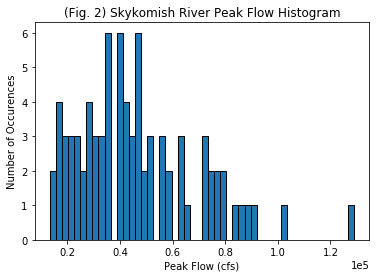

In [39]:
# Define the number of bins for the histogram. Try changing this number and 
# running this cell.
nbins = 50

# Create a new figure.
plt.figure(3)

# Use the hist() function from matplotlib to plot the histogram with lines 
# in between each bin.
plt.hist(Skykomish_Peak, nbins, ec="black")

# Label.
plt.title('(Fig. 3) Skykomish River Peak Flow Histogram')
plt.xlabel('Peak Flow (cfs)')
plt.ylabel('Number of Occurences')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))

### Quantile Plot
Next, plot the data as a quantile plot with Cunnane plotting position.
Note that Cunnane Quantile Mapping is discussed in Lecture 2 of CEE465/CEWA565.  You can also find background on this in Section 2.1.3 (on p. 22-24) of Helsel and Hirsch.

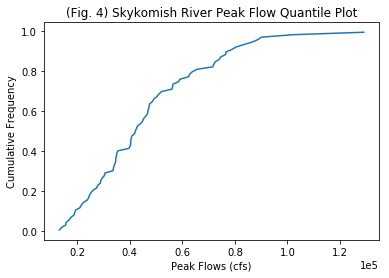

In [40]:
# Create a function that will return objects needed to create a quantile plot.
# The function will take an array of data as an argument and return the data
# as an ordered array and the plotting position associated with each data point.
def quantile_fn(data):

    # Create an array of ordered data using the sorted() function.
    ordered_data = sorted(data)
    
    # Define the length of the ordered_data array using the len() function.
    n = len(ordered_data)

    # Assign a rank and plotting position to each data point using a for loop.
    rank = []
    plotting_position = []
    for i in range(n):
        rank.append(i+1)
        # Using the Cunnane plotting position.
        plotting_position.append((rank[i]-.4)/(n+.2))
        
    return ordered_data, plotting_position
# Note, this last line specifies which data will be output when the function is called

# Call quantile function defined above with our data.
# Note that in our usage here, Skykomish_Data is the ordered_data and Skykomish_Plotting 
# is the plotting_position (this refers to the order in which these two are listed)
Skykomish_Data, Skykomish_Plotting = quantile_fn(Skykomish_Peak)
    
# Plot the ordered data by plotting position.
plt.figure(4)
plt.plot(Skykomish_Data, Skykomish_Plotting)
plt.xlabel('Peak Flows (cfs)')
plt.ylabel('Cumulative Frequency')
plt.title('(Fig. 4) Skykomish River Peak Flow Quantile Plot')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))

### Probability Distribution Function
Next, plot the data as a PDF.

In [42]:
# Create a function for the PDF.
# The function will take in the array of data (data) and number of bins (nbins) used for the histogram.
def pdf_fn(data, nbins):
    
    # Using the hist() function and the function arguments, find:
    # counts (an array): the number of data points for each bin
    # bins (an array): the location of the left side of each bin and the right side of the last bin
    # patches (a list): the style properties of the histogram. We will not use these, but hist() returns them.
    counts, bins, patches = plt.hist(data, nbins)
    
    # Close the histogram using the close() function so that it does not display.
    plt.close()
    
    # Create an array with the location of the center of each bin.
    width = bins[2]-bins[1]
    centers = bins + width/2
    # plt.hist() returns the right side of the last bin, which we don't want in the centers array.
    # To get rid of this, first convert the centers array to a list.
    centers_list = np.array(centers).tolist()
    # Then, remove the last number from the list.
    centers_list.remove(centers_list[len(centers_list)-1])
      # why is there a -1 at the end?  Is that because the counters start at 0 in python?  

    # Calculate the area of each bin.
    areas = [c * width for c in counts]
    # Calculate the total area using the sum() function.
    area_under_curve = sum(areas)

    # Calculate the fraction of area vs counts for each bin.
    fractions = [c / area_under_curve for c in counts]
    
    # Return a list of the location of the center of each bin and the fraction of area vs counts for each bin.
    return centers_list, fractions



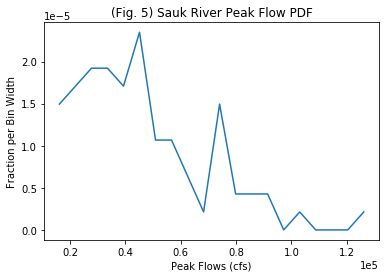

In [45]:
# Call PDF function with our data.
# Play with changing the number of bins here -- which looks optimal for making a smooth PDF?
nbins = 20
centers_list, fractions = pdf_fn(Skykomish_Peak, nbins)

# Plot PDF.
plt.figure(5)
plt.plot(centers_list, fractions)
plt.xlabel('Peak Flows (cfs)')
plt.ylabel('Fraction per Bin Width')
plt.title('(Fig. 5) Sauk River Peak Flow PDF')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

### Normal Cumulative Distribution Function
Next, create a normally-distributed CDF using the calculated mean and standard deviation of the data and compare to the quantile plot.

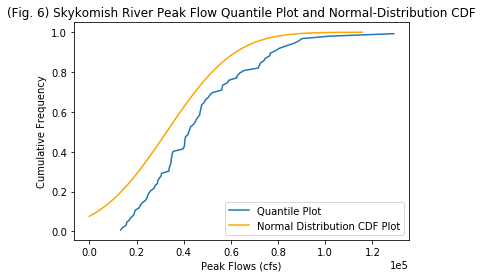

In [48]:
# Create a function to return the values needed to plot a normally-distributed CDF.
# The function takes an array of data as an argument and returns an array of 
# evenly spaced intervals for the range of the data, the mean, and standard 
# deviation using the stats and numpy modules.
def make_normal_dist_cdf(data):
    
    # Calculate the mean and standard deviation of the data using the 
    # statistics module.
    mean = stats.mean(data)
    sd = stats.stdev(data)
    
    # Find the range of the data.
    n = len(data)
    num = int(data[n-1]-data[0])
    
    return np.linspace(data[0], data[n-1], num), mean, sd

# Call CDF function for data.
ordered_Skykomish, mean, sd = make_normal_dist_cdf(Skykomish_Data)

# Plot.
plt.figure(6)
plt.plot(Skykomish_Data, Skykomish_Plotting, label="Quantile Plot")
plt.plot(norm.cdf(ordered_Skykomish, mean, sd), color='orange', label='Normal Distribution CDF Plot')
plt.xlabel('Peak Flows (cfs)')
plt.ylabel('Cumulative Frequency')
plt.title('(Fig. 6) Skykomish River Peak Flow Quantile Plot and Normal-Distribution CDF')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.legend(loc="best")

### Take a moment to look at your graph above.  What did you just plot?  What is it telling you?

### Boxplot
Create a boxplot of the data.  Look at Section 2.1.4 of Helsel and Hirsh (page 24-26).  What are the standard components of a box plot?  Note that different plotting programs may plot the components differently.  Look at the details of the boxplot function in the matplotlib library (https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html) and identify what each line and circle on the boxplot graph you create here represents.  Look at the Boxplot Demo and note that you can customize your boxplots to show exactly what you want.  You are always responsible for knowing the details of what you are plotting and why.

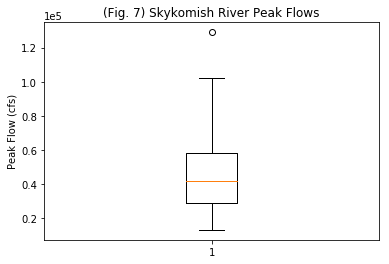

In [49]:
# Use the boxplot() function.
plt.figure(7)
plt.boxplot(Skykomish_Peak)
plt.ylabel('Peak Flow (cfs)')
plt.title('(Fig. 7) Skykomish River Peak Flows')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))